# JPEG Coding Project
####  Nov.2020
####  Mersap Group

In [19]:
# --- importing pakages
import numpy as np
import cv2
from matplotlib import pyplot as plt

![](jpeg-encoder.jpg)

In [20]:
# --- reading image
img = cv2.imread("lenna.png")

# --- resize image
img = cv2.resize(img, (128, 128))

In [21]:
# --- getting YCbCr and select Luminance for first time
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
y = img_ycrcb[:, :, 0]
cr = img_ycrcb[:, :, 1]
cb = img_ycrcb[:, :, 2]


### 1.Blocking

In [22]:
# --- get 8*8 block of luminance and saved it in result
# --- and Make a DCT of each of this blocks
rows = np.shape(y)[0]
cols = np.shape(y)[1]
num = int(rows/8 * cols/8)
result = np.zeros((num, 8, 8))


for i in range(int(cols/8)):
    for j in range(int(rows/8)):
        result[i*int(rows/8)+j ,:,:] = y[j+j*7:j+j*7+7+1,i+i*7:i+i*7+7+1]


### 2.DCT

In [23]:
# --- Make DCT of each block 
result_DCT = np.zeros((num, 8, 8))
for i in range(num):
    result_DCT[i,:,:] = cv2.dct(result[i,:,:])

### 3.Define Quatizing Coeff and Quntize each blocks

In [24]:
# --- define Quantize Matrix
Coeff = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                  [12, 12, 14, 19, 26, 58, 60, 55],
                  [14, 13, 16, 24, 40, 57, 69, 56],
                  [14, 17, 22, 29, 51, 87, 80, 62],
                  [18, 22, 37, 56, 68, 109, 103, 77],
                  [24, 35, 55, 64, 81, 104, 113, 92],
                  [49, 64, 78, 87, 103, 121, 120, 101],
                  [72, 92, 95, 98, 112, 100, 103, 99]
                 ])

In [25]:
# --- Quantizing all 8*8 blocks
quatized_result = np.zeros((num, 8, 8))
for i in range(num):
    quatized_result[i,:,:] = np.int_(result_DCT[i,:,:] / Coeff)

In [26]:
# --- for tesing show a block
quatized_result[1,:,:]

array([[78.,  4., -2., -1.,  0.,  0.,  0.,  0.],
       [ 4., -5.,  0.,  1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### 4.ZigZap 

In [27]:
# --- define a function that make stream data in ZigZag way of 8*8 bloks
def zigzag(mat):
    out = np.array((1,64))
    out = [mat[0,0], mat[0,1], mat[1,0], mat[2,0],
           mat[1,1], mat[0,2], mat[0,3], mat[1,2],
           mat[2,1], mat[3,0], mat[4,0], mat[3,1],
           mat[2,2], mat[1,3], mat[0,4], mat[0,5],
           mat[1,4], mat[2,3], mat[3,2], mat[4,1],
           mat[5,0], mat[6,0], mat[5,1], mat[4,2],
           mat[3,3], mat[2,4], mat[1,5], mat[0,6],
           mat[0,7], mat[1,6], mat[2,5], mat[3,4],
           mat[4,3], mat[5,2], mat[6,1], mat[7,0],
           mat[7,1], mat[6,2], mat[5,3], mat[4,4],
           mat[3,5], mat[2,6], mat[1,7], mat[2,7],
           mat[3,6], mat[4,5], mat[5,4], mat[6,3],
           mat[7,2], mat[7,3], mat[6,4], mat[5,5],
           mat[4,6], mat[3,7], mat[4,7], mat[5,6],
           mat[6,5], mat[7,4], mat[7,5], mat[6,6],
           mat[5,7], mat[6,7], mat[7,6], mat[7,7],
          ]
    return out

def izigzag(numbers):
    mat = np.zeros((8,8))
    mat[0,0] = numbers[0]  ; mat[0,1] = numbers[1]  ; mat[1,0] = numbers[2]  ; mat[2,0] = numbers[3]  ;
    mat[1,1] = numbers[4]  ; mat[0,2] = numbers[5]  ; mat[0,3] = numbers[6]  ; mat[1,2] = numbers[7]  ;
    mat[2,1] = numbers[8]  ; mat[3,0] = numbers[9]  ; mat[4,0] = numbers[10] ; mat[3,1] = numbers[11] ;
    mat[2,2] = numbers[12] ; mat[1,3] = numbers[13] ; mat[0,4] = numbers[14] ; mat[0,5] = numbers[15] ;
    mat[1,4] = numbers[16] ; mat[2,3] = numbers[17] ; mat[3,2] = numbers[18] ; mat[4,1] = numbers[19] ;
    mat[5,0] = numbers[20] ; mat[6,0] = numbers[21] ; mat[5,1] = numbers[22] ; mat[4,2] = numbers[23] ;
    mat[3,3] = numbers[24] ; mat[2,4] = numbers[25] ; mat[1,5] = numbers[26] ; mat[0,6] = numbers[27] ;
    mat[0,7] = numbers[28] ; mat[1,6] = numbers[29] ; mat[2,5] = numbers[30] ; mat[3,4] = numbers[31] ;
    mat[4,3] = numbers[32] ; mat[5,2] = numbers[33] ; mat[6,1] = numbers[34] ; mat[7,0] = numbers[35] ;
    mat[7,1] = numbers[36] ; mat[6,2] = numbers[37] ; mat[5,3] = numbers[38] ; mat[4,4] = numbers[39] ;
    mat[3,5] = numbers[40] ; mat[2,6] = numbers[41] ; mat[1,7] = numbers[42] ; mat[2,7] = numbers[43] ;
    mat[3,6] = numbers[44] ; mat[4,5] = numbers[45] ; mat[5,4] = numbers[46] ; mat[6,3] = numbers[47] ;
    mat[7,2] = numbers[48] ; mat[7,3] = numbers[49] ; mat[6,4] = numbers[50] ; mat[5,5] = numbers[51] ;
    mat[4,6] = numbers[52] ; mat[3,7] = numbers[53] ; mat[4,7] = numbers[54] ; mat[5,6] = numbers[55] ;
    mat[6,5] = numbers[56] ; mat[7,4] = numbers[57] ; mat[7,5] = numbers[58] ; mat[6,6] = numbers[59] ;
    mat[5,7] = numbers[60] ; mat[6,7] = numbers[61] ; mat[7,6] = numbers[62] ; mat[7,7] = numbers[63] 
    
    return mat

In [28]:
# --- saved stream data
stream = np.zeros((num,64))
for i in range(num):
    stream[i,:] = zigzag(quatized_result[i,:,:])

In [29]:
# --- seprate DC and AC Values
dc = [i[0] for i in stream]
ac = [i[1:] for i in stream]

### DPCM Coding for DC Values

In [30]:
# --- DPCM Coding for DC
dc_encoded = [n-dc[i-1] for i,n in enumerate(dc)]
dc_encoded[0] = dc[0]

### RLC Coding for AC values but seperated for each blocks

In [31]:
# --- AC RLC Coding
ac_encoded = []
temp_list = []
for i in range(np.shape(ac)[0]):
    print(i,end=" ")
    temp = 0
    # --- for each zero inc 1 temp Variable until recive a non-zero var
    # --- for last zero in a 64*64 list we set a zero to show this block is end 
    for j,n in enumerate(ac[i]):
        if n==0:
            temp += 1
            if (j == np.shape(ac)[1] - 1):
                temp_list.append(temp)    
                temp_list.append(0)
        else:
            temp_list.append(temp)
            temp_list.append(n)
            temp =0
    ac_encoded.append(temp_list)
    temp_list = []

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 

### first Huffman Table and it`s decoder functions

In [32]:
# --- huffman table and Decoded
def huffTable(num):
    if num>0:
        return [int(i) for i in bin(num)[2:]]
    elif num ==0:
        return []
    else:
        return [(0 if int(i)==1 else 1) for i in bin(abs(num))[2:]]

def HuffDec(bits):
    flag = 1
    result = 0
    if bits != []:
        if np.size(bits) == 1:
            if bits == 0:
                result = -1
            else:
                result = 1
        else:
            if bits[0] == 0:
                bits = [(0 if i==1 else 1) for i in bits]
                flag = -1
            len = np.shape(bits)[0]
            for i,bit in enumerate(bits):
                result += bit*(2**(len-1-i))
    else:
        result = 0
            
    return flag*result
    

### Entropy Coding and Decoding Functions

In [33]:
# --- entropy by size and Ientropy
def entropy(size):
    table = [
        [0,0],
        [0,1,0],
        [0,1,1],
        [1,0,0],
        [1,0,1],
        [1,1,0],
        [1,1,1,0],
        [1,1,1,1,0],
        [1,1,1,1,1,0],
        [1,1,1,1,1,1,0],
        [1,1,1,1,1,1,1,0],
        [1,1,1,1,1,1,1,1,0]
    ]
    return table[size]


def iEntropy(bits):
    table = [
        [0,0],
        [0,1,0],
        [0,1,1],
        [1,0,0],
        [1,0,1],
        [1,1,0],
        [1,1,1,0],
        [1,1,1,1,0],
        [1,1,1,1,1,0],
        [1,1,1,1,1,1,0],
        [1,1,1,1,1,1,1,0],
        [1,1,1,1,1,1,1,1,0]
    ]
    if bits in table:
        return table.index(bits)
    else:
        return 12
   


### Entropy coding for DC VAlues that have been coded with DPCM

In [34]:
# --- entripy coding for DC Values
dc_binary = [entropy(np.shape(huffTable(int(n)))[0])+huffTable(int(n)) for n in dc_encoded]

#### testing some Variable

In [35]:
dc_binary[0:5]

[[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0],
 [0, 0],
 [1, 1, 0, 0, 1, 0, 1, 1],
 [1, 0, 1, 0, 1, 0, 1],
 [0, 1, 1, 1, 1]]

In [36]:
ac_encoded[0]

[3, 1.0, 59, 0]

In [37]:
ac[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Entropy Coding for AC Values and make an stream data that each block sep with 101010 code

In [88]:
# --- ac Entropy coder
ac_binary = []
for row in ac_encoded:
    row = row + [1,0,1,0,1,0,1,0,1,0]
    for i,n in enumerate(row):
            ac_binary = ac_binary + entropy(np.shape(huffTable(int(n)))[0]) + huffTable(int(n))                                                                        

In [89]:
for i in ac_binary[0:65]:
    print(i,end=',')

0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,

### 

# It`s time to decode all things

### Entropy coding Function that uses iEntropy function

In [90]:
def entropy_decode(bits):
    decode_values = []
    flag = False
    temp = []
    i = 0
    while (True):
        temp.append(bits[i])
        if(iEntropy(temp) != 12):  
            shift = iEntropy(temp)
            if shift!=1:
                data  = HuffDec(bits[i+1:i+shift+1])
            else:
                data  = HuffDec(bits[i+1])
            decode_values.append(data)
            i += shift+1
            temp = []
        else:
            i += 1
        
        if (i == np.shape(bits)[0]):
            break
    
    return decode_values

In [91]:
entropy_decode([0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1])

[0, -2, 0, 6, 0, 1, 0, 1, 59, 0, 1, 0, 1, 0, 1, 6, 0]

### Ac Decodeing 

In [92]:
# --- Decode all Acs
temp_decode = entropy_decode(ac_binary)

### Seprate each block

In [94]:
# --- get each block seprate
ac_decode = []
temp = []
last = 0
for i,n in enumerate(temp_decode):
    if (n==1 and 
        (temp_decode[i+1]==0) and (temp_decode[i+2]==1) and 
        (temp_decode[i+3]==0) and (temp_decode[i+4]==1) and 
        (temp_decode[i+5]==0) and (temp_decode[i+6]==1) and 
        (temp_decode[i+7]==0) and (temp_decode[i+8]==1) and
        (temp_decode[i+9]==0)):
        ac_decode.append(temp_decode[last:i])
        last = i+10
        if last >= np.shape(temp_decode)[0]:
            break

In [95]:
np.int_(ac_encoded[7])

array([ 0, -1,  3,  4,  0, -3,  7,  1, 49,  0])

In [107]:
ac_decode == ac_encoded

True

In [ ]:
# --- testing witch block has been completly damage
for i in range(np.shape(ac_decode)[0]):
    if(ac_decode[i] != ac_encoded[i]):
        print(i)

### DC Decoding

In [98]:
dc_decode = []
for bits in dc_binary:
    temp = entropy_decode(bits)
    dc_decode.append(temp)

dc_final = [0]
for i,n in enumerate(dc_decode):
    if i==0:
        dc_final[i] = (dc_decode[i][0])
    else:
        dc_final.append(dc_decode[i][0] + dc_final[i-1])


In [99]:
dc_final == dc

True

### for each block make 8*8 matrix with izigzag

In [100]:
# --- make all 8*8 together
# ac_encoded
final_blocks = np.zeros((num, 8, 8))
for i in range(num):
    temp = []
    for j,n in enumerate(ac_encoded[i]):
        if j==(np.shape(ac_encoded[i])[0]-1) and n==0:
            pass
        elif j%2==0:
            for k in range(n):
                temp.append(0)
        else:
            temp.append(n)
    final_blocks[i,:,:] = izigzag([0]+temp)
    final_blocks[i,0,0] = dc_final[i]

In [101]:
final_blocks[63]

array([[34., -5.,  1., -1.,  0.,  2.,  0.,  0.],
       [-4.,  0., -1.,  2.,  0.,  0.,  0.,  0.],
       [-2.,  3., -2.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [102]:
(final_blocks == quatized_result)

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [51]:
quatized_result[63]

array([[34., -5.,  1., -1.,  0.,  2.,  0.,  0.],
       [-4.,  0., -1.,  2.,  0.,  0.,  0.,  0.],
       [-2.,  3., -2.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [103]:
ac_encoded[0]

[3, 1.0, 59, 0]

###  Inverse Quatize and IDCT

In [104]:
Iblocks = np.zeros((num,8,8))
for i in range(num):
    Iblocks[i,:,:] = final_blocks[i,:,:] * Coeff
    Iblocks[i,:,:] = cv2.idct(Iblocks[i,:,:])

### Make all things together

In [105]:
# --- 
picture = np.zeros((rows,cols))
for i in range(int(cols/8)):
    for j in range(int(rows/8)):
        picture[j+j*7:j+j*7+7+1,i+i*7:i+i*7+7+1] = Iblocks[i*int(rows/8)+j ,:,:]

### Saving this pictures

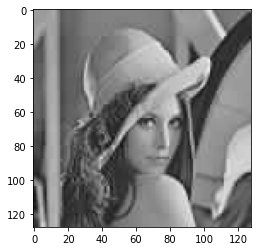

In [106]:
temp = cv2.cvtColor(np.uint8(picture),cv2.COLOR_GRAY2RGB)
# temp = cv2.resize(temp,(512,512))
cv2.imwrite("output.png",temp)
cv2.imwrite("y.png",y)
plt.imshow(temp)
plt.show()
# plt.title('my picture')
# plt.show()